In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
pd.options.display.max_columns = None
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [9]:
# Aus Open = Hard Court
# French Open = Clay Court
# Wim = Grass Court
# US Open = Hard Court
df = pd.read_csv('FrenchOpen-women-2013.csv')
display(df)

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Su-Wei Hsieh,Maria Sharapova,1,0,0,2,62,18,38,5,0.0,3.0,8,8,0,0,1,3,31,2,1.0,NaN,NaN,NaN,68,25,32,8,4.0,0.0,25,19,4,6,3,5,57,6,6.0,NaN,NaN,NaN
1,Eugenie Bouchard,Tsvetana Pironkova,1,1,2,0,57,23,43,17,3.0,1.0,37,21,4,10,16,20,71,6,7.0,NaN,NaN,NaN,66,28,34,6,1.0,2.0,13,21,1,3,4,8,48,1,6.0,NaN,NaN,NaN
2,Jie Zheng,Vesna Dolonc,1,1,2,0,76,30,24,5,1.0,0.0,25,13,4,12,4,5,70,6,6.0,NaN,NaN,NaN,76,35,24,6,0.0,3.0,20,25,0,4,14,20,56,4,1.0,NaN,NaN,NaN
3,Tamira Paszek,Melanie Oudin,1,0,0,2,59,16,41,8,2.0,6.0,21,38,6,15,2,4,66,4,3.0,NaN,NaN,NaN,63,27,37,9,0.0,3.0,24,29,8,13,5,8,78,6,6.0,NaN,NaN,NaN
4,Karin Knapp,Sloane Stephens,1,0,0,2,57,18,43,13,NaN,3.0,15,27,2,2,3,5,50,2,5.0,NaN,NaN,NaN,65,22,35,10,NaN,2.0,9,16,5,7,1,4,61,6,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Agnieszka Radwanska,Sara Errani,5,0,0,2,70,28,30,5,2.0,2.0,27,27,5,11,20,34,72,4,6.0,NaN,NaN,NaN,84,41,16,3,0.0,0.0,30,25,6,7,16,24,80,6,7.0,NaN,NaN,NaN
123,Serena Williams,Svetlana Kuznetsova,5,1,2,1,66,42,34,12,4.0,5.0,37,28,6,16,12,20,92,6,3.0,6.0,NaN,NaN,77,28,23,7,1.0,1.0,19,24,4,9,3,6,75,1,6.0,3.0,NaN,NaN
124,Victoria Azarenka,Maria Sharapova,6,0,1,2,72,28,28,8,3.0,0.0,15,22,5,10,8,10,77,1,6.0,4.0,NaN,NaN,62,41,38,10,12.0,11.0,42,39,6,10,2,6,87,6,2.0,6.0,NaN,NaN
125,Serena Williams,Sara Errani,6,1,2,0,52,14,48,14,5.0,NaN,40,12,5,7,8,10,52,6,6.0,NaN,NaN,NaN,80,10,20,1,0.0,NaN,2,3,0,0,2,2,16,0,1.0,NaN,NaN,NaN


In [10]:
df = df.rename(columns={'BPC.1': 'BPW.1', 'BPW.1': 'BPC.1','BPC.2': 'BPW.2', 'BPW.2': 'BPC.2'})

In [20]:
df1 = df[['Result','BPW.1','BPC.1','BPW.2','BPC.2']]

[[15  2]
 [ 1  8]]
Accuracy: 0.8846153846153846


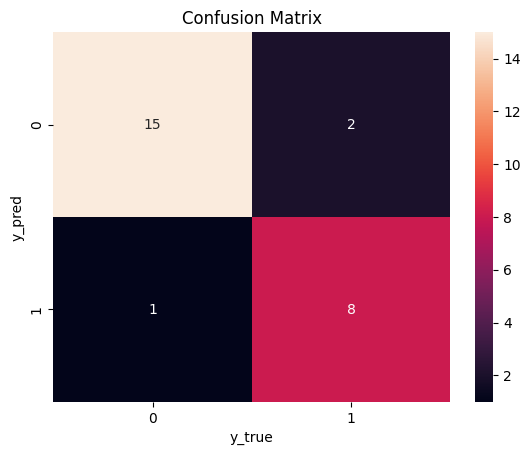

In [27]:

X = df[['BPW.1', 'BPC.1', 'BPW.2', 'BPC.2']]
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title('Confusion Matrix')
plt.xlabel('y_true')
plt.ylabel('y_pred')
print(confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy)